# **Exploratory Data Analysis**
This EDA is on fourth down's in the NFL

## **Loading in the data**
Data is from the nflfastR and nflreadr libraries, which where uploaded to csv files in a different RMD

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine.data import mpg
from plotnine import ggplot, aes, geom_point, geom_abline, geom_bar, geom_col

In [127]:
pbp = pd.read_csv("play_by_play_data.csv")

C:\Users\djhic\AppData\Local\Temp\ipykernel_56540\1554983149.py:1: DtypeWarning: Columns (180,181,183,184,190,191,194,195,198,199,204,205,206,207,210,211,214,215,219,220,221,223,225,227,234,235,236,237,238,239,244,245,246,249,250,254,255,256,261,263,264,267,268,269,270,284,285,303,333) have mixed types. Specify dtype option on import or set low_memory=False.


In [128]:
display(pbp.head())

,Unnamed: 0,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,1,2019_01_ATL_MIN,2019090804,MIN,ATL,REG,1,NaN,NaN,...,0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,36,2019_01_ATL_MIN,2019090804,MIN,ATL,REG,1,ATL,away,...,0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,51,2019_01_ATL_MIN,2019090804,MIN,ATL,REG,1,ATL,away,...,0,0,-1.658763,NaN,NaN,NaN,NaN,NaN,0.486799,51.320082
3,4,79,2019_01_ATL_MIN,2019090804,MIN,ATL,REG,1,ATL,away,...,0,0,-0.538914,NaN,NaN,NaN,NaN,NaN,0.639994,-63.999379
4,5,100,2019_01_ATL_MIN,2019090804,MIN,ATL,REG,1,ATL,away,...,0,0,0.142138,NaN,NaN,NaN,NaN,NaN,0.933516,6.648362


In [129]:
display(pbp.shape)

(293478, 373)

In [130]:
list(pbp.columns)

['Unnamed: 0',
 'play_id',
 'game_id',
 'old_game_id',
 'home_team',
 'away_team',
 'season_type',
 'week',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'td_player_name',
 'td_player_id',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_diff

In [131]:
pbp_selected = pbp[["play_id", "game_id", "home_team", "away_team", "season",
                                   "season_type", "week", "posteam", "posteam_type",
                                   "defteam", "side_of_field", "yardline_100",
                                   "game_date", "quarter_seconds_remaining",
                                   "half_seconds_remaining", "game_seconds_remaining",
                              "qtr", "down", "time", "goal_to_go", "yrdln", "ydstogo",
                              "ydsnet", "play_type", "yards_gained", "score_differential", "fourth_down_converted", "fourth_down_failed", "timeout_team", "penalty", "penalty_team", "penalty_type", "weather", "wind", "stadium_id"]]

In [132]:
pbp_fourth = pbp_selected[pbp_selected["down"] == 4]
pbp_fourth["game_date"] = pd.to_datetime(pbp_fourth["game_date"], errors= 'coerce');

conds = [
    pbp_fourth["play_type"] == "punt",
    pbp_fourth["play_type"] == "no_play",
    pbp_fourth["play_type"] == "field_goal",
    pbp_fourth["play_type"] == "run",
    pbp_fourth["play_type"].isna(),
    pbp_fourth["play_type"] == "qb_kneel",
    pbp_fourth["play_type"] == "pass",
]
choices = ["punt", "no_play", "field_goal", "went for it", "nan", "qb_kneel", "went for it"]

pbp_fourth["play_type2"] = np.select(conds, choices, default = "other")

C:\Users\djhic\AppData\Local\Temp\ipykernel_56540\2191025579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\djhic\AppData\Local\Temp\ipykernel_56540\2191025579.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## **Start of the EDA**

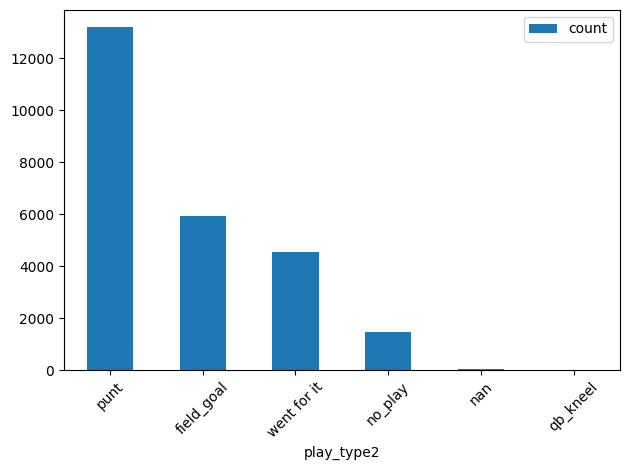

In [133]:
play_type_count = pbp_fourth.groupby("play_type2").agg(count=("play_type2","size")).reset_index().sort_values("count", ascending=False)
play_type_count.plot(kind = "bar", x = "play_type2", y = "count", rot = 45)
plt.tight_layout()
plt.show()

In [134]:
conds = [
    pbp_fourth["play_type2"] == "went for it", 
]
choices = [1]
pbp_fourth["went_for_it"] = np.select(conds, choices, default=0)

pbp_fourth.groupby('season').agg(fourth_downs = ("went_for_it", "count"), went_total = ("went_for_it", "sum")).assign(rate = lambda d: d["went_total"]/d["fourth_downs"]).reset_index()

C:\Users\djhic\AppData\Local\Temp\ipykernel_56540\2578738756.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,season,fourth_downs,went_total,rate
0,2019,4042,621,0.153637
1,2020,3832,687,0.179280
2,2021,4254,826,0.194170
3,2022,4300,770,0.179070
4,2023,4490,833,0.185523
5,2024,4279,816,0.190699


* Might be some increase in teams willingness to go for it on fourth down
## **What teams are the most aggressive in going for it**

In [135]:
# Overall for the past 5 seasons
pbp_fourth.groupby('posteam').agg(
    fourth_downs = ("went_for_it", "count"), 
    went_total = ("went_for_it", "sum")
).assign(rate = lambda d : d["went_total"]/d["fourth_downs"]).reset_index().sort_values('rate', ascending=False).head(10)

,posteam,fourth_downs,went_total,rate
10,DET,768,191,0.248698
7,CLE,850,195,0.229412
25,PHI,819,184,0.224664
0,ARI,761,169,0.222076
4,CAR,842,184,0.218527
14,JAX,777,166,0.213642
5,CHI,819,174,0.212454
23,NYG,862,183,0.212297
13,IND,800,168,0.210000
17,LAC,782,154,0.196931


In [136]:
# Season by Season
pbp_fourth.groupby(['season', 'posteam']).agg(
    fourth_downs = ("went_for_it", "count"), 
    went_total = ("went_for_it", "sum")
).assign(rate = lambda d : d["went_total"]/d["fourth_downs"]).reset_index().sort_values('rate', ascending=False).head(10)

,season,posteam,fourth_downs,went_total,rate
170,2024,DET,113,35,0.309735
138,2023,DET,147,45,0.306122
106,2022,DET,123,37,0.300813
103,2022,CLE,141,42,0.297872
96,2022,ARI,140,41,0.292857
132,2023,CAR,168,48,0.285714
74,2021,DET,147,41,0.278912
81,2021,LAC,123,34,0.276423
69,2021,CHI,132,36,0.272727
121,2022,PHI,137,37,0.270073


## **What Teams are most successful in going for it**

In [137]:
(pbp_fourth[pbp_fourth["play_type2"] == "went for it"]
    .groupby('posteam').agg(attempts = ("went_for_it", "count"), converted = ("fourth_down_converted", "sum"))
    .assign(rate = lambda d: d['converted']/d['attempts'])
    .reset_index().sort_values('rate', ascending = False)).head(10)

,posteam,attempts,converted,rate
15,KC,109,70.0,0.642202
3,BUF,124,76.0,0.612903
18,LV,133,81.0,0.609023
2,BAL,132,78.0,0.590909
31,WAS,157,91.0,0.579618
29,TB,121,69.0,0.570248
9,DEN,127,72.0,0.566929
13,IND,168,95.0,0.565476
16,LA,121,68.0,0.561983
25,PHI,184,103.0,0.559783


In [138]:
(pbp_fourth[(pbp_fourth["play_type2"] == "went for it")]
    .groupby(["season", 'posteam']).agg(attempts = ("went_for_it", "count"), converted = ("fourth_down_converted", "sum"))
    .assign(rate = lambda d: d['converted']/d['attempts'])
    .reset_index().sort_values('rate', ascending = False)).head(10)

,season,posteam,attempts,converted,rate
35,2020,BUF,12,10.0,0.833333
51,2020,MIA,10,8.0,0.800000
191,2024,WAS,38,30.0,0.789474
112,2022,LA,19,15.0,0.789474
111,2022,KC,13,10.0,0.769231
50,2020,LV,21,16.0,0.761905
85,2021,NE,20,15.0,0.750000
163,2024,BUF,31,23.0,0.741935
122,2022,PIT,15,11.0,0.733333
121,2022,PHI,37,27.0,0.729730


## **Yards to go**
### **How far to go vs. did they go for it**

In [139]:
conds = [
    pbp_fourth["ydstogo"] <= 10,
    (pbp_fourth["ydstogo"] > 10) & (pbp_fourth['ydstogo'] <= 15),
    (pbp_fourth["ydstogo"] > 15) & (pbp_fourth['ydstogo'] <= 20),
    pbp_fourth["ydstogo"] >= 10
]
choices = [pbp_fourth['ydstogo'].astype(str), "11 to 15 yards to go", "16 to 20 yards to go", "More than 20 yards to go"]

pbp_fourth["ydstogo_buckets"] = np.select(conds, choices)

C:\Users\djhic\AppData\Local\Temp\ipykernel_56540\3306591612.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [140]:
(pbp_fourth.groupby("ydstogo_buckets")
 .agg(fourth_downs = ("went_for_it", "count"), went_total = ("went_for_it", "sum"))
 .assign(rate = lambda d: d["went_total"]/d["fourth_downs"])
 .reset_index().sort_values("rate", ascending= False))

,ydstogo_buckets,fourth_downs,went_total,rate
0,1,3002,1799,0.599267
4,2,1942,672,0.346035
5,3,1885,406,0.215385
6,4,1923,337,0.175247
7,5,2018,263,0.130327
1,10,1754,204,0.116306
8,6,1761,174,0.098807
9,7,1737,142,0.081750
10,8,1504,112,0.074468
12,More than 20 yards to go,804,54,0.067164


### **How far to go vs. conversion rate**

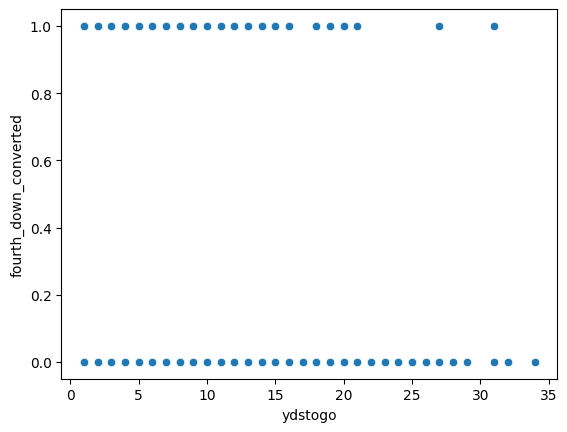

In [141]:
went_for_it = pbp_fourth[pbp_fourth["play_type2"] == "went for it"]
sns.scatterplot(data = went_for_it, x = "ydstogo", y = "fourth_down_converted")
plt.show()

In [142]:
(went_for_it.groupby("ydstogo_buckets")
    .agg(attempts = ("went_for_it", "count"), success = ("fourth_down_converted", "sum"))
    .assign(conversion_rate = lambda d: d["success"]/d["attempts"])
    .reset_index().sort_values("conversion_rate", ascending= False))

,ydstogo_buckets,attempts,success,conversion_rate
0,1,1799,1210.0,0.672596
4,2,672,386.0,0.574405
5,3,406,207.0,0.509852
7,5,263,128.0,0.486692
6,4,337,163.0,0.483680
8,6,174,71.0,0.408046
9,7,142,56.0,0.394366
10,8,112,39.0,0.348214
11,9,71,21.0,0.295775
1,10,204,60.0,0.294118


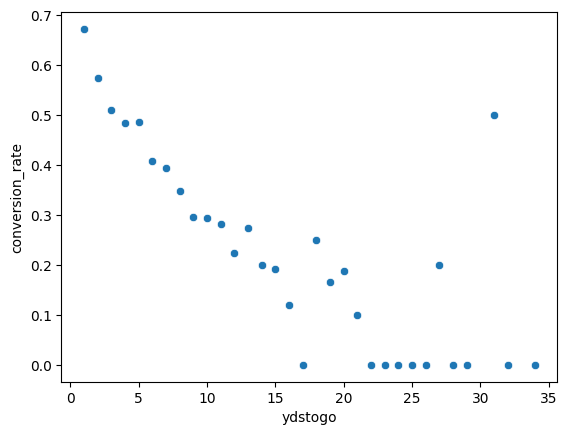

In [143]:
yards_grouped = (went_for_it.groupby("ydstogo")
    .agg(attempts = ("went_for_it", "count"), success = ("fourth_down_converted", "sum"))
    .assign(conversion_rate = lambda d: d["success"]/d["attempts"])
    .reset_index().sort_values("conversion_rate", ascending= False))

sns.scatterplot(data = yards_grouped, x = "ydstogo", y = "conversion_rate")
plt.show()

## **Where you are on the field**
### **Where you are on the field vs. attempted**

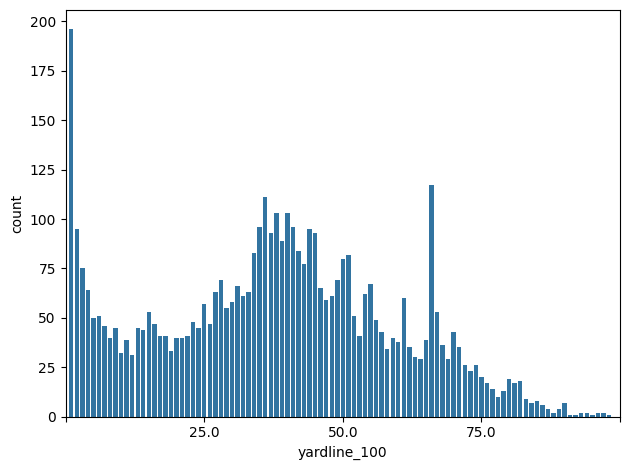

In [144]:
grouped_yardline = (went_for_it.groupby("yardline_100")
    .agg(count = ("went_for_it", "count"))
    .reset_index())

ax = sns.barplot(data = grouped_yardline, x = "yardline_100", y = "count")
ticks = [-1, 24, 49, 74, 99]
ax.set_xticks(ticks)
plt.tight_layout()
plt.show()

### **Where you are on the field vs. conversion rate**

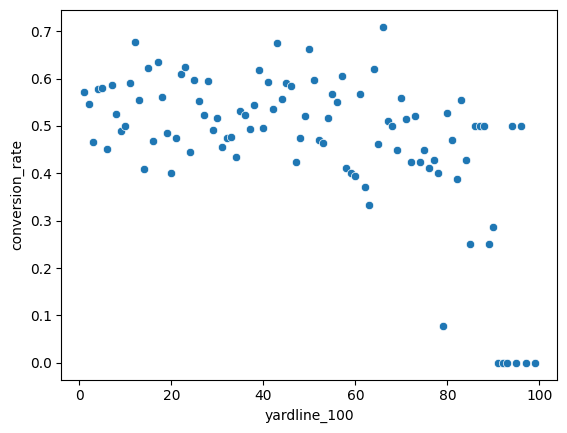

In [145]:
grouped_yardline2 = (went_for_it.groupby("yardline_100")
    .agg(attempts = ("went_for_it", "count"), success = ("fourth_down_converted", "sum"))
    .assign(conversion_rate = lambda d: d["success"]/d["attempts"])
    .reset_index())

sns.scatterplot(data = grouped_yardline2, x = "yardline_100", y = "conversion_rate")
plt.show()

## **Score Differential vs. Attempted**

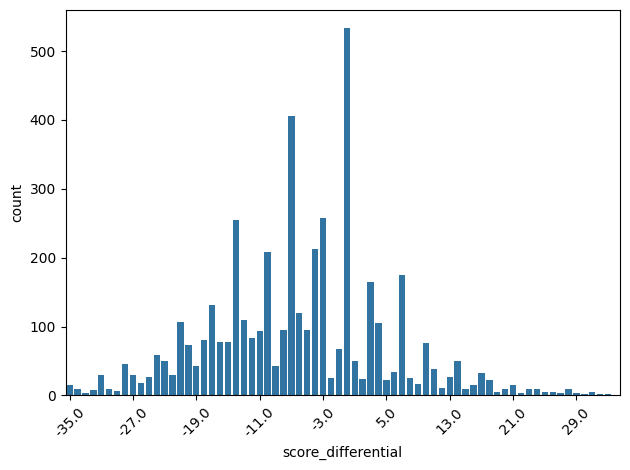

In [146]:
diff_grouped = (went_for_it.groupby("score_differential")
    .agg(count = ("went_for_it", "count"))
    .reset_index())

diff_grouped = diff_grouped[(diff_grouped["score_differential"] >= -35) & (diff_grouped["score_differential"] <= 35)]

ax = sns.barplot(data = diff_grouped, x = "score_differential", y = "count")
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=10, integer=True, prune="both"))
ax.tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()

## **Quarter vs. Attempted**

In [147]:
(went_for_it.groupby("qtr")
    .agg(attempts = ("went_for_it", "count"), success = ("fourth_down_converted", "sum"))
    .assign(rate = lambda d: d["success"]/d["attempts"])
    .reset_index())

,qtr,attempts,success,rate
0,1,624,376.0,0.602564
1,2,931,522.0,0.560687
2,3,774,484.0,0.625323
3,4,2202,1017.0,0.461853
4,5,22,11.0,0.500000


### **Time in fourth quater vs. Attempted**

In [148]:
went_for_it["quarter_minutes_remaining"] = went_for_it["quarter_seconds_remaining"] // 60

C:\Users\djhic\AppData\Local\Temp\ipykernel_56540\1183500529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


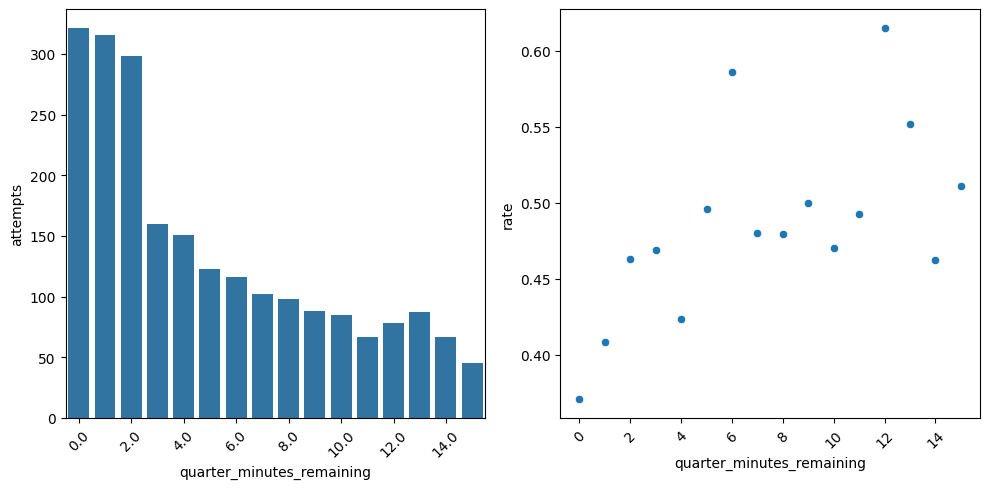

In [149]:
minutes_grouped = (went_for_it[went_for_it["qtr"] == 4]
    .groupby("quarter_minutes_remaining")
    .agg(attempts = ("went_for_it", "count"), success = ("fourth_down_converted", "sum"))
    .assign(rate = lambda d: d["success"]/d["attempts"])
    .reset_index())

fig, (ax1, ax2) = plt.subplots(ncols=2 , figsize=(10, 5))

ax1 = sns.barplot(data=minutes_grouped, x="quarter_minutes_remaining", y="attempts", ax=ax1)
ax1.xaxis.set_major_locator(plt.MaxNLocator(nbins=10, integer=True, prune="both"))
ax1.tick_params(axis="x", rotation=45)

ax2 = sns.scatterplot(data=minutes_grouped, x="quarter_minutes_remaining", y="rate", ax=ax2)
ax2.xaxis.set_major_locator(plt.MaxNLocator(nbins=10, integer=True, prune="both"))
ax2.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

## **Joining on Sesaon and Posteam for offensive and stats and defteam for defensive stats**

In [150]:
offensive_team_stats = pd.read_csv("team_offense_season.csv")
offensive_team_stats = offensive_team_stats.drop(columns="Unnamed: 0")
offensive_team_stats["play_epa_rank"] = offensive_team_stats["off_epa_play"].rank(ascending=False)

defensive_team_stats = pd.read_csv("team_defense_season.csv")
defensive_team_stats = defensive_team_stats.drop(columns="Unnamed: 0")
defensive_team_stats["play_def_rank"] = defensive_team_stats["def_epa_play_allowed"].rank(ascending=True)

In [151]:
wf_with_off = went_for_it.merge(offensive_team_stats, how = "left", left_on=["season", "posteam"], right_on=["season", "team"])

wf_with_features = wf_with_off.merge(defensive_team_stats, how = "left", left_on=["season", "defteam"], right_on=["season", "team"])

len(wf_with_features) == len(went_for_it)

True

## **EDA of offensive and defensive stats**
* Note: comparing off_epa_play to success rate and same with def_epa_play_allowed

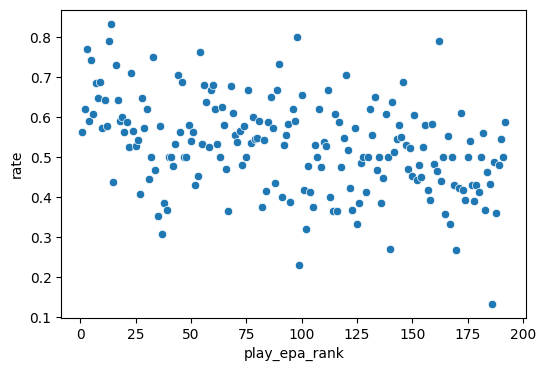

In [152]:
offense_ranked = wf_with_features.groupby("play_epa_rank").agg(
    success = ("fourth_down_converted", "sum"),
    attempts = ("posteam", "count")).assign(rate = lambda d: d["success"]/d["attempts"]).reset_index()

fig = plt.subplots(figsize = (6, 4))
sns.scatterplot(offense_ranked, x = "play_epa_rank", y = "rate")
plt.show()

In [153]:
wf_with_features

,play_id,game_id,home_team,away_team,season,season_type,week,posteam,posteam_type,defteam,...,play_epa_rank,team_y,def_epa_play_allowed,def_epa_db_allowed,def_epa_rush_allowed,def_ypa_allowed,def_ypc_allowed,def_sack_rate,def_int_rate_forced,play_def_rank
0,3279,2019_01_ATL_MIN,MIN,ATL,2019,REG,1,ATL,away,MIN,...,96.0,MIN,-0.049872,-0.018646,-0.097045,6.862385,4.297009,0.052334,0.013761,38.0
1,3882,2019_01_ATL_MIN,MIN,ATL,2019,REG,1,ATL,away,MIN,...,96.0,MIN,-0.049872,-0.018646,-0.097045,6.862385,4.297009,0.052334,0.013761,38.0
2,1763,2019_01_BAL_MIA,MIA,BAL,2019,REG,1,BAL,away,MIA,...,6.0,MIA,0.120756,0.239655,-0.018491,7.987156,4.465979,0.102113,0.033028,186.0
3,3451,2019_01_BAL_MIA,MIA,BAL,2019,REG,1,BAL,away,MIA,...,6.0,MIA,0.120756,0.239655,-0.018491,7.987156,4.465979,0.102113,0.033028,186.0
4,1701,2019_01_BUF_NYJ,NYJ,BUF,2019,REG,1,BUF,away,NYJ,...,122.0,NYJ,-0.049853,0.030581,-0.169444,6.839316,3.335731,0.083871,0.027350,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4548,3908,2024_21_WAS_PHI,PHI,WAS,2024,POST,21,WAS,away,PHI,...,13.0,PHI,-0.085908,-0.065018,-0.117662,6.195714,4.291165,0.076618,0.010000,13.0
4549,4001,2024_21_WAS_PHI,PHI,WAS,2024,POST,21,WAS,away,PHI,...,13.0,PHI,-0.085908,-0.065018,-0.117662,6.195714,4.291165,0.076618,0.010000,13.0
4550,4747,2024_21_WAS_PHI,PHI,WAS,2024,POST,21,WAS,away,PHI,...,13.0,PHI,-0.085908,-0.065018,-0.117662,6.195714,4.291165,0.076618,0.010000,13.0
4551,2834,2024_22_KC_PHI,PHI,KC,2024,POST,22,KC,away,PHI,...,59.0,PHI,-0.085908,-0.065018,-0.117662,6.195714,4.291165,0.076618,0.010000,13.0


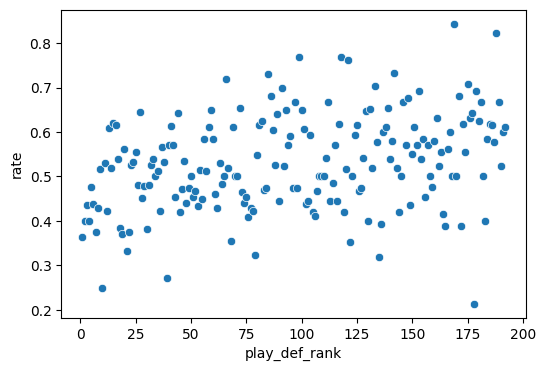

In [154]:
defense_ranked = wf_with_features.groupby("play_def_rank").agg(
    success = ("fourth_down_converted", "sum"),
    attempts = ("posteam", "count")).assign(rate = lambda d: d["success"]/d["attempts"]).reset_index()

fig = plt.subplots(figsize = (6, 4))
sns.scatterplot(defense_ranked, x = "play_def_rank", y = "rate")
plt.show()